### Import des bibliothèques

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


### Import du dataset 'Fashion MNIST'

In [2]:
fashion_mnist_dataset = keras.datasets.fashion_mnist

### Séparation des images / labels de trains et test
##### X = images / Y = Labels (cible)

In [3]:
(X_train_images,y_train_labels),(X_test_images,y_test_labels)= fashion_mnist_dataset.load_data()

### Liste des noms de labels

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Vérification des tailles de jeux de données

In [5]:
X_train_images.shape

(60000, 28, 28)

In [6]:
len(X_train_images)

60000

In [7]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_test_images.shape

(10000, 28, 28)

In [9]:
len(y_test_labels)

10000

# Preprocess de la donnée

### Visualisation avec dégradé de couleurs

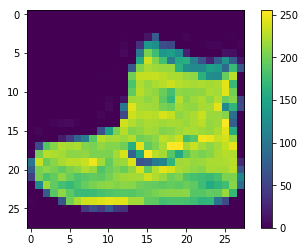

In [10]:
plt.figure()
plt.imshow(X_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Fonction de Normalisation

In [11]:
def standardizer(X_train,X_test):
    scaler = StandardScaler()
    X_train_std = StandardScaler().fit_transform(X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
    X_test_std = StandardScaler().fit_transform(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
    X_train_std = X_train_std.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2])
    X_test_std = X_test_std.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2])  
    return X_train_std,X_test_std

### Normalisation

In [12]:
X_train_images,X_test_images = standardizer(X_train_images,X_test_images)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Affichage des 50 premiers éléments

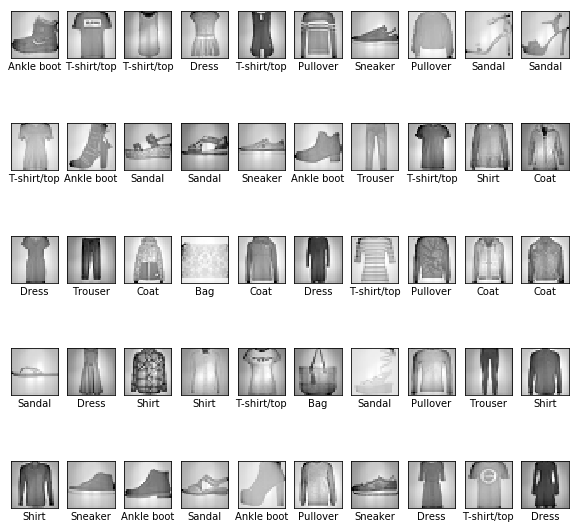

In [13]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i],cmap='binary')
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

### Model building

In [14]:
model = keras.Sequential()

In [15]:
model.add(keras.layers.Flatten(input_shape=(28,28)))

In [16]:
model.add(keras.layers.Dense(512,activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.add(keras.layers.Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.add(keras.layers.Dense(256,activation='relu'))

In [19]:
model.add(keras.layers.Dropout(0.2))

In [20]:
model.add(keras.layers.Dense(128,activation='relu'))

In [21]:
model.add(keras.layers.Dropout(0.2))

In [22]:
model.add(keras.layers.Dense(10,activation='softmax'))

### Pas parfait mais donne un résultat supérieur à 80%

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### J'ai mis adam optimizer

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Création de la liste des callbacks

In [25]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint('mnist_fashion.h5',save_best_only=True)
]

### Entrainement long à cause de la couche de Dense de 512, mais résultat presque similaire à mes premiers

In [26]:
model.fit(X_train_images,y_train_labels,callbacks=callbacks,epochs=100,validation_data=(X_test_images,y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 260us/sample - loss: 0.5927 - acc: 0.7893 - val_loss: 0.4403 - val_acc: 0.8420
Epoch 2/100
60000/60000 [==============================] - 14s 241us/sample - loss: 0.4637 - acc: 0.8340 - val_loss: 0.4101 - val_acc: 0.8515
Epoch 3/100
60000/60000 [==============================] - 15s 245us/sample - loss: 0.4383 - acc: 0.8437 - val_loss: 0.4058 - val_acc: 0.8501
Epoch 4/100
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4128 - acc: 0.8529 - val_loss: 0.3878 - val_acc: 0.8569
Epoch 5/100
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4032 - acc: 0.8571 - val_loss: 0.3703 - val_acc: 0.8666
Epoch 6/100
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3910 - acc: 0.8618 - val_loss: 0.3716 - val_acc: 0.8656
Epoch 7/100
60000/60000 [==============================] - 15s 252us/sample - loss: 0.3848 - acc: 

### Evalution du modèle

In [27]:
model = keras.models.load_model('mnist_fashion.h5')
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3418 - acc: 0.8764
Test accuracy: 0.8764
Test loss: 0.34180702849626543


### Prédiction

In [28]:
prediction = model.predict(X_test_images)

In [29]:
prediction[0]

array([7.5728277e-09, 2.0351427e-12, 2.8742597e-10, 3.1842110e-10,
       7.9795104e-10, 1.1199888e-02, 8.7266644e-10, 5.1252086e-02,
       1.2640384e-06, 9.3754679e-01], dtype=float32)

In [30]:
np.argmax(prediction[0])

9

In [31]:
y_test_labels[0]

9

### Fonction pour affirmer si les prédictions sont vraies ou fausses

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


### Vérification avec deux images

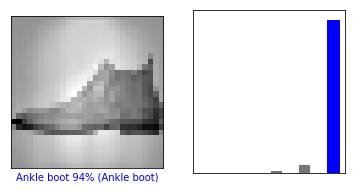

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,y_test_labels,X_test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,y_test_labels)
plt.show()

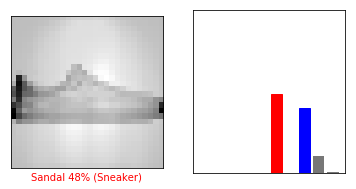

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,y_test_labels,X_test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,y_test_labels)
plt.show()

### Affichage des 50 premières prédictions

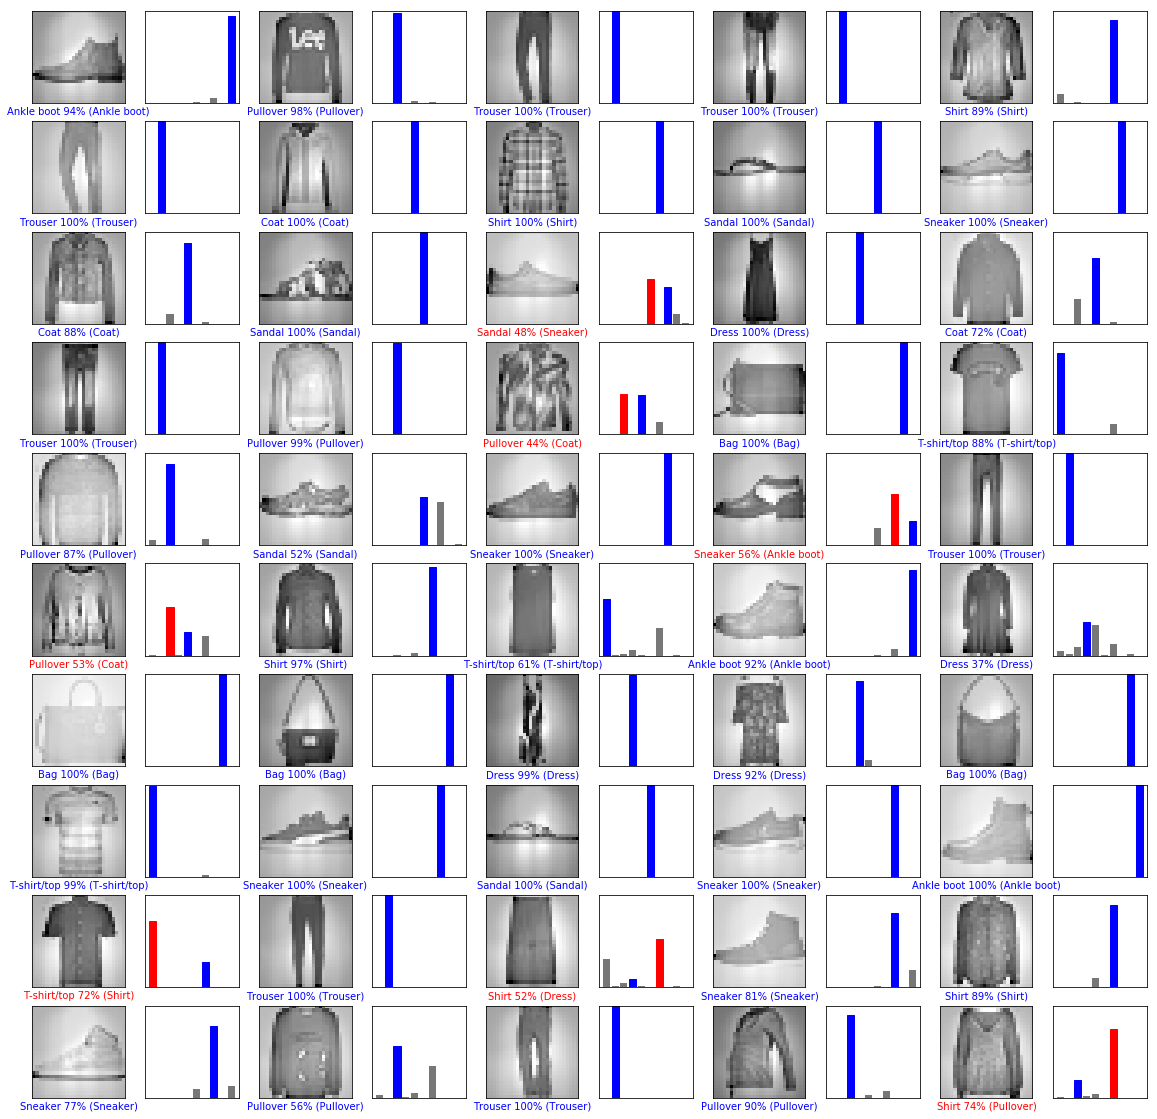

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, y_test_labels, X_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, y_test_labels)
plt.show()

In [36]:
# Grab an image from the test dataset
img = X_test_images[0]

print(img.shape)

(28, 28)


In [37]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [38]:
single_prediction = model.predict(img)
print(single_prediction)

[[7.5728988e-09 2.0351615e-12 2.8742808e-10 3.1842343e-10 7.9795692e-10
  1.1199911e-02 8.7267454e-10 5.1252216e-02 1.2640453e-06 9.3754655e-01]]


### Prédiction singulière

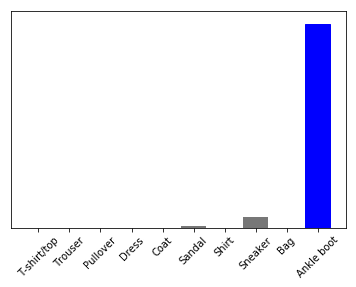

In [39]:
plot_value_array(0, single_prediction, y_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(single_prediction[0])

9